In [1442]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
# data_url = "http://lib.stat.cmu.edu/datasets/boston"
# raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
# data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
# target = raw_df.values[1::2, 2]
import warnings
warnings.filterwarnings(action='ignore')
boston = load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [1443]:
print(boston.data.shape)

(506, 13)


In [1444]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [1445]:
X = boston.data
y = boston.target

In [1446]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=15)

In [1447]:
print(X.shape[0])
print(float(X_train.shape[0]) / float(X.shape[0]))
print(float(X_test.shape[0]) / float(X.shape[0]))

506
0.7984189723320159
0.2015810276679842


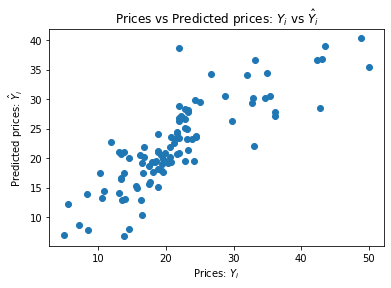

In [1448]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
reg = LinearRegression()
reg = reg.fit(X_train, y_train)
y_predict = reg.predict(X_test)
plt.scatter(y_test, y_predict)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [1449]:
from sklearn.metrics import mean_squared_error, accuracy_score
MSE = mean_squared_error(y_test, y_predict)
print(f"Mean squared error = {MSE}")

Mean squared error = 23.812245465080583


In [1450]:
test_score = reg.score(X_test, y_test)
print(f"Test score = {test_score}")

train_score = reg.score(X_train, y_train)
print(f"Train score = {train_score}")

Test score = 0.6920749038652155
Train score = 0.7455344405641732


In [1451]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

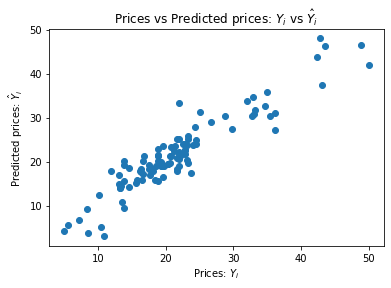

In [1452]:
scaler = StandardScaler()
polynomial_features = PolynomialFeatures(degree=2)
X_scaled = scaler.fit_transform(X)
X_scaled = polynomial_features.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.2, random_state=15)

reg2 = LinearRegression()
reg2 = reg2.fit(X_train, y_train)
y_predict = reg2.predict(X_test)
plt.scatter(y_test, y_predict)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [1453]:
MSE = mean_squared_error(y_test, y_predict)
print(f"Mean squared error = {MSE}")

test_score = reg2.score(X_test, y_test)
print(f"Test score = {test_score}")

train_score = reg2.score(X_train, y_train)
print(f"Train score = {train_score}")

Mean squared error = 10.370854382421458
Test score = 0.8658905840110711
Train score = 0.9324854569546294


In [1454]:
from sklearn.linear_model import Ridge, Lasso

#### Lasso

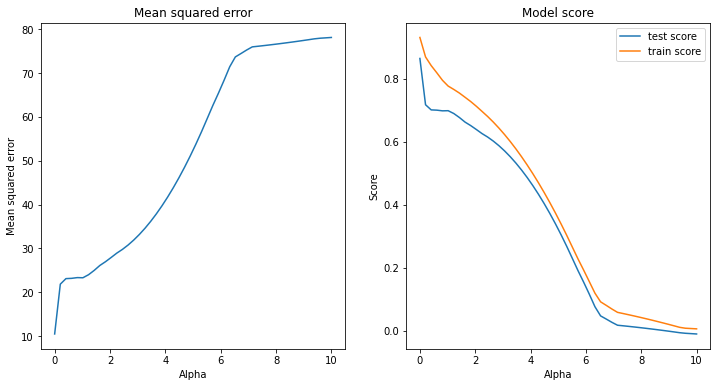

In [1455]:
alpha_range = np.linspace(0.001, 10)
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=15)
mse_vect = []
test_vect = []
train_vect = []
for alpha in alpha_range:
  clf = Lasso(alpha=alpha)
  clf.fit(X_train,y_train)
  y_predict = clf.predict(X_test)
  MSE = mean_squared_error(y_test, y_predict)
  mse_vect.append(MSE)
  test_score = clf.score(X_test, y_test)
  test_vect.append(test_score)
  train_score = clf.score(X_train, y_train)
  train_vect.append(train_score)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
ax1.plot(alpha_range, mse_vect)
ax1.set_xlabel("Alpha")
ax1.set_ylabel("Mean squared error")
ax1.set_title("Mean squared error")

ax2.plot(alpha_range, test_vect, label="test score")
ax2.plot(alpha_range, train_vect, label="train score")
ax2.set_xlabel("Alpha")
ax2.set_ylabel("Score")
ax2.set_title("Model score")
ax2.legend()

plt.show()

#### Ridge

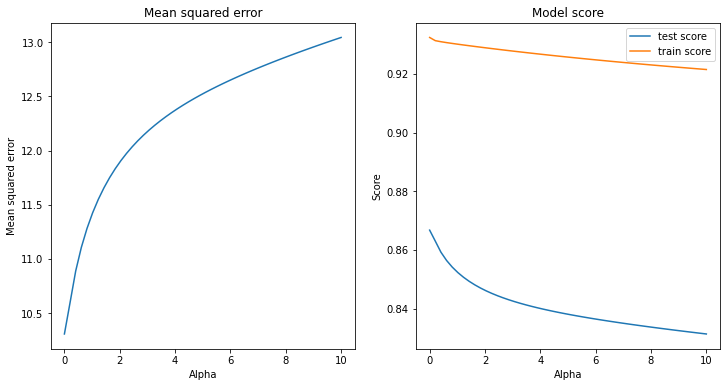

In [1456]:
alpha_range = np.linspace(0.001, 10)
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=15)
mse_vect = []
test_vect = []
train_vect = []
for alpha in alpha_range:
  clf = Ridge(alpha=alpha)
  clf.fit(X_train,y_train)
  y_predict = clf.predict(X_test)
  MSE = mean_squared_error(y_test, y_predict)
  mse_vect.append(MSE)
  test_score = clf.score(X_test, y_test)
  test_vect.append(test_score)
  train_score = clf.score(X_train, y_train)
  train_vect.append(train_score)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
ax1.plot(alpha_range, mse_vect)
ax1.set_xlabel("Alpha")
ax1.set_ylabel("Mean squared error")
ax1.set_title("Mean squared error")

ax2.plot(alpha_range, test_vect, label="test score")
ax2.plot(alpha_range, train_vect, label="train score")
ax2.set_xlabel("Alpha")
ax2.set_ylabel("Score")
ax2.set_title("Model score")
ax2.legend()
plt.show()


#### Dataset A

In [1457]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
data = load_breast_cancer()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=15)
print(X.shape[0])
print(float(X_train.shape[0]) / float(X.shape[0]))
print(float(X_test.shape[0]) / float(X.shape[0]))

569
0.7996485061511424
0.20035149384885764


In [1458]:
clf = LogisticRegression(penalty='l2')
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

In [1459]:
MSE = mean_squared_error(y_test, y_predict)
print(f"Mean squared error = {MSE}")

test_score = clf.score(X_test, y_test)
print(f"Test score = {test_score}")

train_score = clf.score(X_train, y_train)
print(f"Train score = {train_score}")
C = np.linspace(0.001, 10)

Mean squared error = 0.10526315789473684
Test score = 0.8947368421052632
Train score = 0.9626373626373627


In [1460]:
mse_vect = []
test_vect = []
train_vect = []
accuracy = []
for c in C:
  clf = LogisticRegression(penalty='l2',solver='lbfgs',  C=c)
  clf.fit(X_train, y_train)
  y_predict = clf.predict(X_test)
  MSE = mean_squared_error(y_test, y_predict)
  mse_vect.append(MSE)
  test_score = clf.score(X_test, y_test)
  test_vect.append(test_score)
  train_score = clf.score(X_train, y_train)
  train_vect.append(train_score)
  acc = accuracy_score(y_test, y_predict)
  accuracy.append(acc)

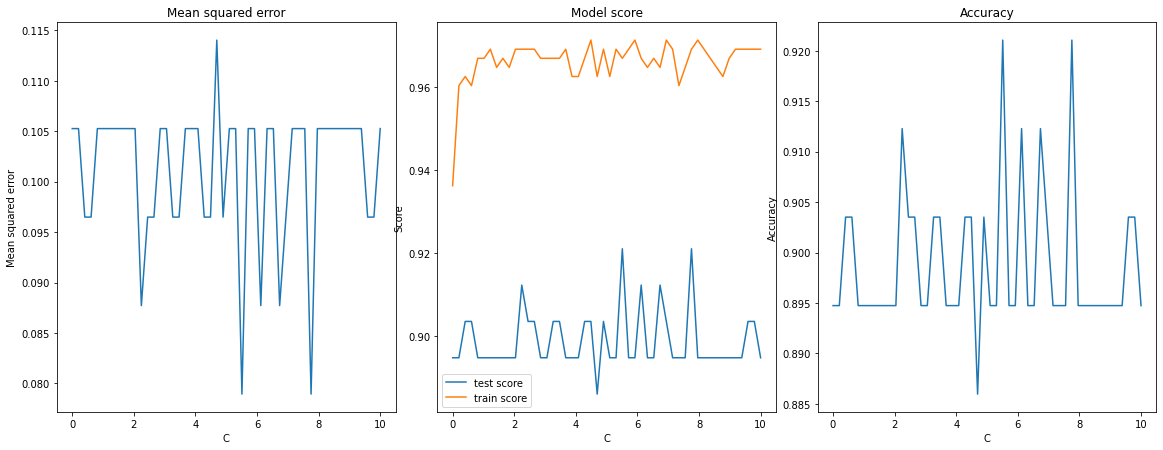

In [1461]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,6))
fig.tight_layout()
ax1.plot(C, mse_vect)
ax1.set_xlabel("C")
ax1.set_ylabel("Mean squared error")
ax1.set_title("Mean squared error")

ax2.plot(C, test_vect, label="test score")
ax2.plot(C, train_vect, label="train score")
ax2.set_xlabel("C")
ax2.set_ylabel("Score")
ax2.set_title("Model score")
ax2.legend()

ax3.plot(alpha_range, accuracy)
ax3.set_xlabel("C")
ax3.set_ylabel("Accuracy")
ax3.set_title("Accuracy")
plt.show()


#### Dataset B

In [1462]:
path = 'https://uu-sml.github.io/course-sml-public/data/biopsy.csv'
dataset = pd.read_csv(path, na_values='?', dtype={'ID': str})
dataset.columns = ['ID', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']
dataset.head(5)

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,benign
1,1002945,5,4,4,5,7,10.0,3,2,1,benign
2,1015425,3,1,1,1,2,2.0,3,1,1,benign
3,1016277,6,8,8,1,3,4.0,3,7,1,benign
4,1017023,4,1,1,3,2,1.0,3,1,1,benign


In [1463]:
dataset['Bare Nuclei'].fillna(dataset['Bare Nuclei'].mean(), inplace=True)
dataset.drop('ID', inplace=True, axis=1)
dataset.head(5)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,benign
1,5,4,4,5,7,10.0,3,2,1,benign
2,3,1,1,1,2,2.0,3,1,1,benign
3,6,8,8,1,3,4.0,3,7,1,benign
4,4,1,1,3,2,1.0,3,1,1,benign


In [1464]:
print(set(dataset['Class']))
y = np.where(dataset['Class'] == "benign", 0, 1)
X = dataset.drop('Class', axis=1)

{'malignant', 'benign'}


In [1465]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=15)
print(X.shape[0])
print(float(X_train.shape[0]) / float(X.shape[0]))
print(float(X_test.shape[0]) / float(X.shape[0]))

699
0.7997138769670958
0.20028612303290416


In [1466]:
clf = LogisticRegression(penalty='l2')
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

In [1467]:
MSE = mean_squared_error(y_test, y_predict)
print(f"Mean squared error = {MSE}")

test_score = clf.score(X_test, y_test)
print(f"Test score = {test_score}")

train_score = clf.score(X_train, y_train)
print(f"Train score = {train_score}")

Mean squared error = 0.03571428571428571
Test score = 0.9642857142857143
Train score = 0.9695885509838998


In [1468]:
C = np.linspace(0.0001, 1)
mse_vect = []
test_vect = []
train_vect = []
accuracy = []
for c in C:
  clf = LogisticRegression(penalty='l2', solver='lbfgs', C=c)
  clf.fit(X_train, y_train)
  y_predict = clf.predict(X_test)
  MSE = mean_squared_error(y_test, y_predict)
  mse_vect.append(MSE)
  test_score = clf.score(X_test, y_test)
  test_vect.append(test_score)
  train_score = clf.score(X_train, y_train)
  train_vect.append(train_score)
  acc = accuracy_score(y_test, y_predict)
  accuracy.append(acc)

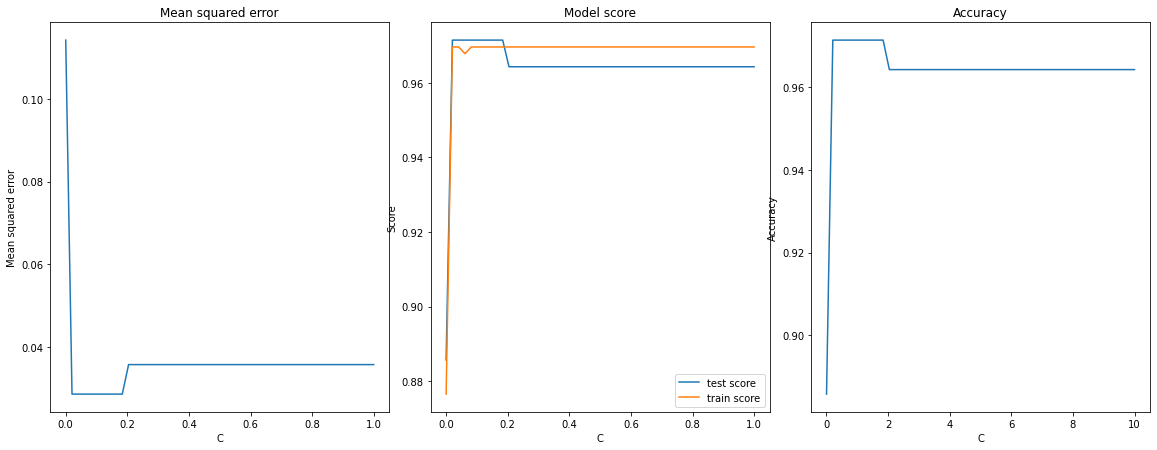

In [1469]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 6))
fig.tight_layout()
ax1.plot(C, mse_vect)
ax1.set_xlabel("C")
ax1.set_ylabel("Mean squared error")
ax1.set_title("Mean squared error")

ax2.plot(C, test_vect, label="test score")
ax2.plot(C, train_vect, label="train score")
ax2.set_xlabel("C")
ax2.set_ylabel("Score")
ax2.set_title("Model score")
ax2.legend()
ax3.plot(alpha_range, accuracy)
ax3.set_xlabel("C")
ax3.set_ylabel("Accuracy")
ax3.set_title("Accuracy")
plt.show()